# Integrated Project: Video Game Success

Project description: 
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


Data description
—Name
—Platform
—Year_of_Release
—Genre
—NA_sales (North American sales in USD million)
—EU_sales (sales in Europe in USD million)
—JP_sales (sales in Japan in USD million)
—Other_sales (sales in other countries in USD million)
—Critic_Score (maximum of 100)
—User_Score (maximum of 10)
—Rating (ESRB)
Data for 2016 may be incomplete.


---



---



## Step 1. Open the data file and study the general information


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [ ]:
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Step 2. Prepare the data

#### Replace the column names (make them lowercase).

In [ ]:
df.columns = df.columns.str.lower()

#### Convert the data to the required types.
#### Describe the columns where the data types have been changed and why.
#### If necessary, decide how to deal with missing values:
#### Explain why you filled in the missing values as you did or why you decided to leave them blank.
#### Why do you think the values are missing? Give possible reasons.
#### Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
null_name_data = df[df['name'].isnull()]

In [ ]:
print(null_name_data)

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [ ]:
null_name_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 659 to 14244
Data columns (total 11 columns):
name               0 non-null object
platform           2 non-null object
year_of_release    2 non-null float64
genre              0 non-null object
na_sales           2 non-null float64
eu_sales           2 non-null float64
jp_sales           2 non-null float64
other_sales        2 non-null float64
critic_score       0 non-null float64
user_score         0 non-null object
rating             0 non-null object
dtypes: float64(6), object(5)
memory usage: 192.0+ bytes


In [ ]:
df['name'] = df['name'].fillna('unknown name')

I filled in the missing values in name with unknown name, since the rest of the data could be important about sales, platform, or year of release. (The missing values might have occurred because these games were deleted from the store and the system no longer remembers their name.)

In [ ]:
print(df['year_of_release'].head())

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64


In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(-1)

In [ ]:
df['year_of_release'] = df['year_of_release'].astype(int)

Year of release had a decimal so I changed it to int type, since a decimal in a year does not make sense. In order to change the data type, I had to fill missing values, so I assigned them to the -1 value. (The missing values might have happened because the movies were not released yet, or no one typed it into the system.)

In [ ]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [ ]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [ ]:
df['critic_score'] = df['critic_score'].astype(int)

In order to change the data type to int since the numbers do not need decimals, I first had to fill in missing values, so I filled them with -1. (The missing values might mean that the critics did not give a score yet, or no one typed it into the database.)

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', -0.5)

In [ ]:
df['user_score'] = df['user_score'].fillna(-1)

In [ ]:
df['user_score'] = df['user_score'].astype(float)

In order to change from string type to float type in order to later do calculations, I had to replace 'tbd' with -0.5 and the NaN values with -1. Later on, I will handle the tbd cases by considering that the values with -0.5 mean that the user_store was not determined yet. (The missing values might mean that no one typed it into the database or that the users were not given the opportunity to give it a score.)

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
df['rating'] = df['rating'].fillna('unknown rating')

I just needed to replace the missing values with 'unknown rating' to make analysis easier. (The missing values could mean that the game is not rated.)

In [ ]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
null_genre_data = df[df['genre'].isnull()]

In [ ]:
print(null_genre_data)

               name platform  year_of_release genre  na_sales  eu_sales  \
659    unknown name      GEN             1993   NaN      1.78      0.53   
14244  unknown name      GEN             1993   NaN      0.00      0.00   

       jp_sales  other_sales  critic_score  user_score          rating  
659        0.00         0.08            -1        -1.0  unknown rating  
14244      0.03         0.00            -1        -1.0  unknown rating  


In [ ]:
df['genre'] = df['genre'].fillna('Misc')

There were few missing values in the genre column. I decided to group them in with the miscellaneous genre category. (The missing values could mean anything, so they fit in the Misc. category well.)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


#### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.


In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


## Step 3. Analyze the data

#### Look at how many games were released in different years. Is the data for every period significant?


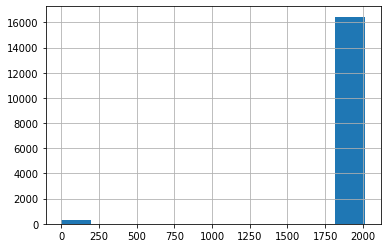

In [ ]:
df['year_of_release'].hist()

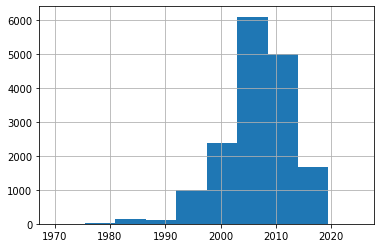

In [ ]:
df['year_of_release'].hist(range=(1970, 2025))

In [ ]:
games_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

In [ ]:
print(games_per_year)

                 name
year_of_release      
-1                269
 1980               9
 1981              46
 1982              36
 1983              17
 1984              14
 1985              14
 1986              21
 1987              16
 1988              15
 1989              17
 1990              16
 1991              41
 1992              43
 1993              62
 1994             121
 1995             219
 1996             263
 1997             289
 1998             379
 1999             338
 2000             350
 2001             482
 2002             829
 2003             775
 2004             762
 2005             939
 2006            1006
 2007            1197
 2008            1427
 2009            1426
 2010            1255
 2011            1136
 2012             653
 2013             544
 2014             581
 2015             606
 2016             502


The data for every period is not significant. It is most significant between 2002 and 2012 (about 700 and above games).

#### Look at how sales varied from platform to platform. 



In [ ]:
sales_per_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [ ]:
print(sales_per_platform)

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52
3DS            259.00
XB             257.74
GB             255.46
NES            251.05
N64            218.68
SNES           200.04
GC             198.93
XOne           159.32
2600            96.98
WiiU            82.19
PSV             54.07
SAT             33.59
GEN             30.77
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


#### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 


In [ ]:
top5_sales_per_platform = sales_per_platform.head()

In [ ]:
print(top5_sales_per_platform)

          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12


PS2

In [ ]:
PS2 = df[df['platform'] == 'PS2']

In [ ]:
PS2_sales_per_year = PS2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(PS2_sales_per_year)

                 total_sales
year_of_release             
-1                     22.21
 2000                  39.17
 2001                 166.43
 2002                 205.38
 2003                 184.31
 2004                 211.81
 2005                 160.66
 2006                 103.42
 2007                  75.99
 2008                  53.90
 2009                  26.40
 2010                   5.64
 2011                   0.45


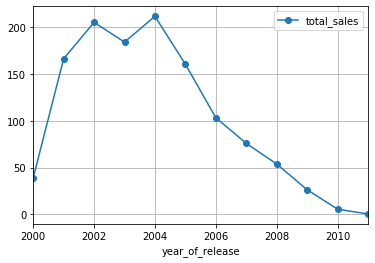

In [ ]:
PS2_sales_per_year.plot(style='o-', xlim=(2000, 2011), grid=True)

X360

In [ ]:
X360 = df[df['platform'] == 'X360']

In [ ]:
X360_sales_per_year = X360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(X360_sales_per_year)

                 total_sales
year_of_release             
-1                     10.18
 2005                   8.25
 2006                  51.62
 2007                  95.41
 2008                 135.26
 2009                 120.29
 2010                 170.03
 2011                 143.84
 2012                  99.74
 2013                  88.58
 2014                  34.74
 2015                  11.96
 2016                   1.52


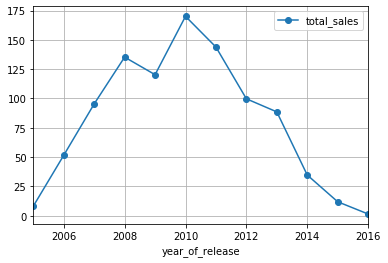

In [ ]:
X360_sales_per_year.plot(style='o-', xlim=(2005, 2016), grid=True)

PS3

In [ ]:
PS3 = df[df['platform'] == 'PS3']

In [ ]:
PS3_sales_per_year = PS3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(PS3_sales_per_year)

                 total_sales
year_of_release             
-1                      8.31
 2006                  20.96
 2007                  73.19
 2008                 118.52
 2009                 130.93
 2010                 142.17
 2011                 156.78
 2012                 107.36
 2013                 113.25
 2014                  47.76
 2015                  16.82
 2016                   3.60


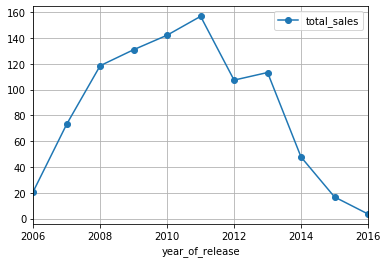

In [ ]:
PS3_sales_per_year.plot(style='o-', xlim=(2006, 2016), grid=True)

Wii

In [ ]:
Wii = df[df['platform'] == 'Wii']

In [ ]:
Wii_sales_per_year = Wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(Wii_sales_per_year)

                 total_sales
year_of_release             
-1                     16.33
 2006                 137.15
 2007                 152.77
 2008                 171.32
 2009                 206.97
 2010                 127.95
 2011                  59.65
 2012                  21.71
 2013                   8.59
 2014                   3.75
 2015                   1.14
 2016                   0.18


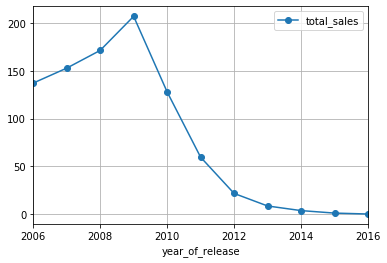

In [ ]:
Wii_sales_per_year.plot(style='o-', xlim=(2006, 2016), grid=True)

DS

In [ ]:
DS = df[df['platform'] == 'DS']

In [ ]:
DS_sales_per_year = DS.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(DS_sales_per_year)

                 total_sales
year_of_release             
-1                      3.34
 1985                   0.02
 2004                  17.27
 2005                 130.14
 2006                 119.81
 2007                 146.94
 2008                 145.31
 2009                 119.54
 2010                  85.02
 2011                  26.18
 2012                  11.01
 2013                   1.54


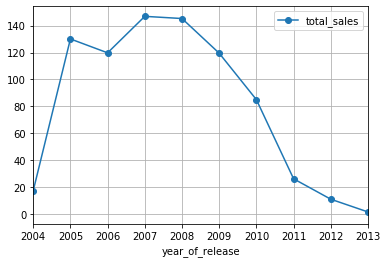

In [ ]:
DS_sales_per_year.plot(style='o-', xlim=(2004, 2013), grid=True)

#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

From the above graphs, it can be seen that it takes about 10 years for a popular platform to gain popularity and then fade away.

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.


I should take data for the period from 1995 to 2016. This will allow many periods of platform popularity rises and falls, and it will also allow there to be well represented data for each year (more than 200 games a year). However, as technology developed and games became more popular, the years after 2000 have a drastically larger number of games represented.

#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [ ]:
relevant_df = df[df['year_of_release'] > 1995]

In [ ]:
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15739 entries, 0 to 16714
Data columns (total 12 columns):
name               15739 non-null object
platform           15739 non-null object
year_of_release    15739 non-null int64
genre              15739 non-null object
na_sales           15739 non-null float64
eu_sales           15739 non-null float64
jp_sales           15739 non-null float64
other_sales        15739 non-null float64
critic_score       15739 non-null int64
user_score         15739 non-null float64
rating             15739 non-null object
total_sales        15739 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


In [ ]:
share_of_data_removed = (16715-15739) / 16715 * 100

In [ ]:
print(share_of_data_removed, '%')

5.8390667065510025 %


Limiting to these years only gets rid of 5 percent of the data.

#### Which platforms are leading in sales? 

In [ ]:
relevant_sales_per_platform = relevant_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [ ]:
print(relevant_sales_per_platform)

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.76
PS             685.59
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
XB             251.57
PC             235.57
N64            218.01
GC             196.73
XOne           159.32
GB             136.30
WiiU            82.19
PSV             53.81
SAT             18.37
SNES            17.39
DC              15.95
WS               1.42
NG               0.10
PCFX             0.03


PS2, X360, PS3, Wii, DS, and PS are leading in sales.

#### Which ones are growing or shrinking? 


PS2

In [ ]:
relevant_PS2 = relevant_df[relevant_df['platform'] == 'PS2']

In [ ]:
relevant_PS2_sales_per_year = relevant_PS2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_PS2_sales_per_year)

                 total_sales
year_of_release             
2000                   39.17
2001                  166.43
2002                  205.38
2003                  184.31
2004                  211.81
2005                  160.66
2006                  103.42
2007                   75.99
2008                   53.90
2009                   26.40
2010                    5.64
2011                    0.45


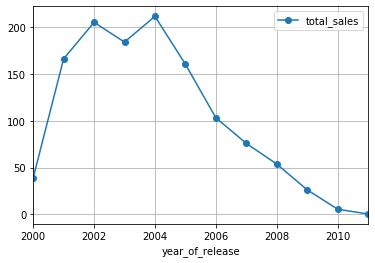

In [ ]:
relevant_PS2_sales_per_year.plot(style='o-', xlim=(2000, 2011), grid=True)

X360

In [ ]:
relevant_X360 = relevant_df[relevant_df['platform'] == 'X360']

In [ ]:
relevant_X360_sales_per_year = relevant_X360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_X360_sales_per_year)

                 total_sales
year_of_release             
2005                    8.25
2006                   51.62
2007                   95.41
2008                  135.26
2009                  120.29
2010                  170.03
2011                  143.84
2012                   99.74
2013                   88.58
2014                   34.74
2015                   11.96
2016                    1.52


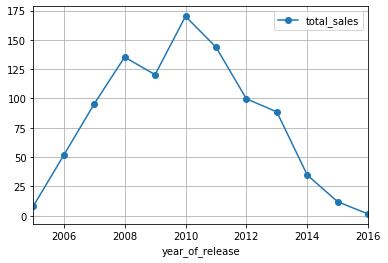

In [ ]:
relevant_X360_sales_per_year.plot(style='o-', xlim=(2005, 2016), grid=True)

PS3

In [ ]:
relevant_PS3 = relevant_df[relevant_df['platform'] == 'PS3']

In [ ]:
relevant_PS3_sales_per_year = relevant_PS3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_PS3_sales_per_year)

                 total_sales
year_of_release             
2006                   20.96
2007                   73.19
2008                  118.52
2009                  130.93
2010                  142.17
2011                  156.78
2012                  107.36
2013                  113.25
2014                   47.76
2015                   16.82
2016                    3.60


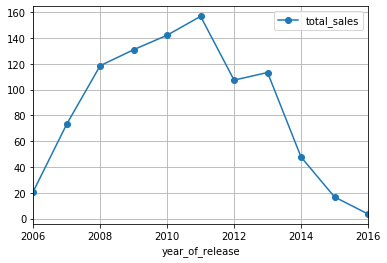

In [ ]:
relevant_PS3_sales_per_year.plot(style='o-', xlim=(2006, 2016), grid=True)

Wii

In [ ]:
relevant_Wii = relevant_df[relevant_df['platform'] == 'Wii']

In [ ]:
relevant_Wii_sales_per_year = relevant_Wii.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_Wii_sales_per_year)

                 total_sales
year_of_release             
2006                  137.15
2007                  152.77
2008                  171.32
2009                  206.97
2010                  127.95
2011                   59.65
2012                   21.71
2013                    8.59
2014                    3.75
2015                    1.14
2016                    0.18


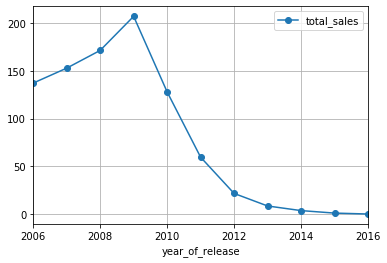

In [ ]:
relevant_Wii_sales_per_year.plot(style='o-', xlim=(2006, 2016), grid=True)

DS

In [ ]:
relevant_DS = relevant_df[relevant_df['platform'] == 'DS']

In [ ]:
relevant_DS_sales_per_year = relevant_DS.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_DS_sales_per_year)

                 total_sales
year_of_release             
2004                   17.27
2005                  130.14
2006                  119.81
2007                  146.94
2008                  145.31
2009                  119.54
2010                   85.02
2011                   26.18
2012                   11.01
2013                    1.54


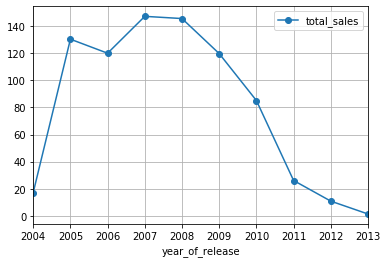

In [ ]:
relevant_DS_sales_per_year.plot(style='o-', xlim=(2004, 2013), grid=True)

PS

In [ ]:
relevant_PS = relevant_df[relevant_df['platform'] == 'PS']

In [ ]:
relevant_PS_sales_per_year = relevant_PS.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_PS_sales_per_year)

                 total_sales
year_of_release             
1996                   94.70
1997                  136.17
1998                  169.49
1999                  144.53
2000                   96.37
2001                   35.59
2002                    6.67
2003                    2.07


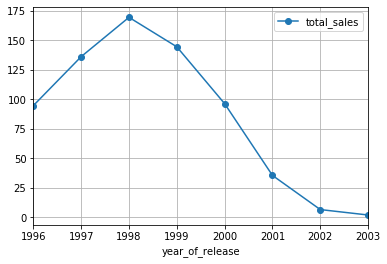

In [ ]:
relevant_PS_sales_per_year.plot(style='o-', xlim=(1996, 2003), grid=True)

The platforms with leading sales over the chosen period have already reached their peak popularity and sales have been decreasing for a long time. The sales for all of the above are shrinking. I will try to find some with some recent popularity in 2016. Maybe those will be growing in sales.

In [ ]:
last_year_data = df[df['year_of_release'] == 2016]

In [ ]:
recent_sales_per_platform = last_year_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

In [ ]:
print(recent_sales_per_platform)

          total_sales
platform             
PS4             69.25
XOne            26.15
3DS             15.14
PC               5.25
WiiU             4.60
PSV              4.25
PS3              3.60
X360             1.52
Wii              0.18


PS4, XOne, 3DS, PC, WiiU, and PSV are potentially profitable. I need to check if they are increasing or decreasing in sales to decide.

PS4

In [ ]:
relevant_PS4 = relevant_df[relevant_df['platform'] == 'PS4']

In [ ]:
relevant_PS4_sales_per_year = relevant_PS4.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_PS4_sales_per_year)

                 total_sales
year_of_release             
2013                   25.99
2014                  100.00
2015                  118.90
2016                   69.25


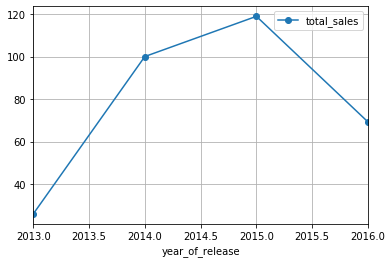

In [ ]:
relevant_PS4_sales_per_year.plot(style='o-', xlim=(2013, 2016), grid=True)

XOne

In [ ]:
relevant_XOne = relevant_df[relevant_df['platform'] == 'XOne']

In [ ]:
relevant_XOne_sales_per_year = relevant_XOne.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_XOne_sales_per_year)

                 total_sales
year_of_release             
2013                   18.96
2014                   54.07
2015                   60.14
2016                   26.15


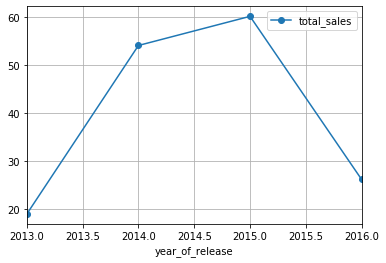

In [ ]:
relevant_XOne_sales_per_year.plot(style='o-', xlim=(2013, 2016), grid=True)

3DS

In [ ]:
relevant_3DS = relevant_df[relevant_df['platform'] == '3DS']

In [ ]:
relevant_3DS_sales_per_year = relevant_3DS.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_3DS_sales_per_year)

                 total_sales
year_of_release             
2011                   63.20
2012                   51.36
2013                   56.57
2014                   43.76
2015                   27.78
2016                   15.14


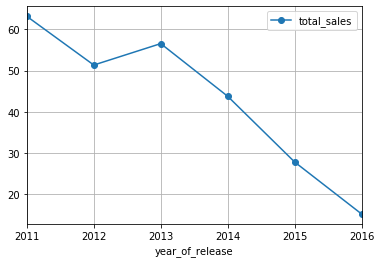

In [ ]:
relevant_3DS_sales_per_year.plot(style='o-', xlim=(2011, 2016), grid=True)

PC

In [ ]:
relevant_PC = relevant_df[relevant_df['platform'] == 'PC']

In [ ]:
relevant_PC_sales_per_year = relevant_PC.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_PC_sales_per_year)

                 total_sales
year_of_release             
1996                   10.58
1997                   11.27
1998                    3.26
1999                    4.74
2000                    4.66
2001                    5.47
2002                    8.57
2003                    8.84
2004                   10.39
2005                    4.37
2006                    2.85
2007                    9.28
2008                   12.42
2009                   16.91
2010                   24.28
2011                   35.03
2012                   23.22
2013                   12.38
2014                   13.28
2015                    8.52
2016                    5.25


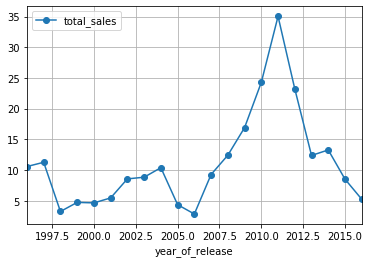

In [ ]:
relevant_PC_sales_per_year.plot(style='o-', xlim=(1996, 2016), grid=True)

WiiU

In [ ]:
relevant_WiiU = relevant_df[relevant_df['platform'] == 'WiiU']

In [ ]:
relevant_WiiU_sales_per_year = relevant_WiiU.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_WiiU_sales_per_year)

                 total_sales
year_of_release             
2012                   17.56
2013                   21.65
2014                   22.03
2015                   16.35
2016                    4.60


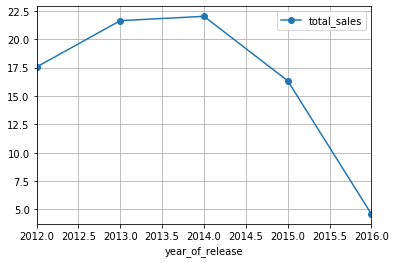

In [ ]:
relevant_WiiU_sales_per_year.plot(style='o-', xlim=(2012, 2016), grid=True)

PSV

In [ ]:
relevant_PSV = relevant_df[relevant_df['platform'] == 'PSV']

In [ ]:
relevant_PSV_sales_per_year = relevant_PSV.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [ ]:
print(relevant_PSV_sales_per_year)

                 total_sales
year_of_release             
2011                    4.63
2012                   16.19
2013                   10.59
2014                   11.90
2015                    6.25
2016                    4.25


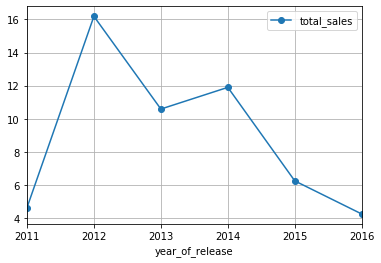

In [ ]:
relevant_PSV_sales_per_year.plot(style='o-', xlim=(2011, 2016), grid=True)

#### Select several potentially profitable platforms.


Most platforms seem to be decreasing. However, PS4 and XOne are not decreasing until the 2016 data point. The PS4 decrease is not very large compared to the peak (it dropped from 120 to 70). As seen in the past graphs of the high total_sales platforms, some successful platforms also had a drop one year and then an increase the next year. Thus, PS4 is potentially profitable. Although XOne has a similar drop in 2016, the drop is a lot bigger compared to the peak (from 60 to 25), so I believe it will not be as profitable as the PS4 but it still can be potentially profitable. In addition, both have been only used for 3 years, and have not reached the 10 years in which sales disappear.

In sum, I believe PS4 and XOne can be potentially profitable platforms.

#### Build a box plot for the global sales of all games, broken down by platform.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
relevant_sales_per_platform = relevant_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')

In [ ]:
relevant_sales_per_platform.columns = ['total_sales_for_platform']

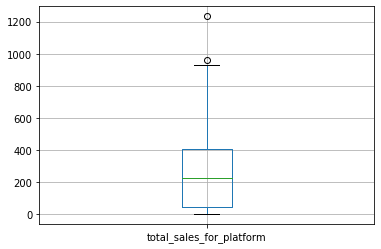

In [ ]:
relevant_sales_per_platform.boxplot(column='total_sales_for_platform')

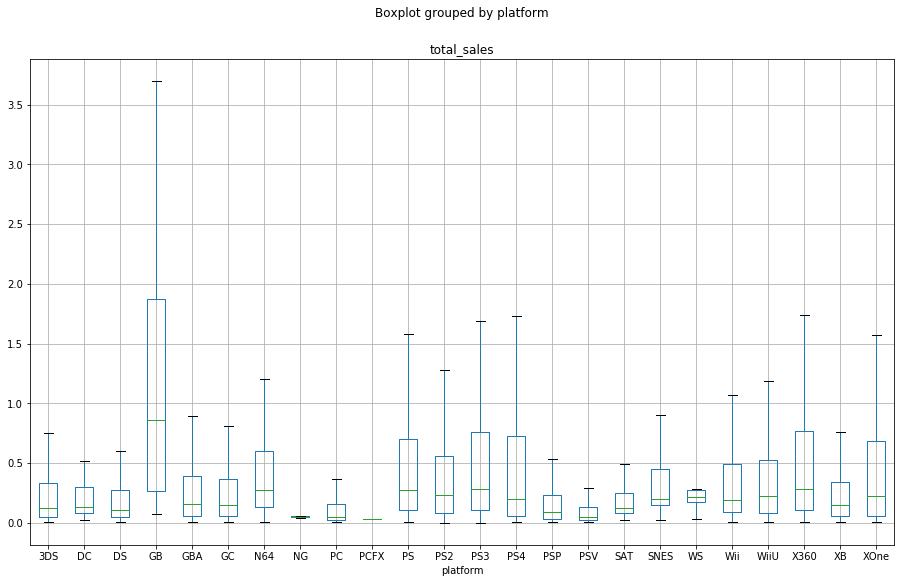

In [ ]:
relevant_df.boxplot(by='platform', column='total_sales', figsize=(15,9), showfliers=False)

#### Are the differences in sales significant? 

The differences in sales are a bit large. There are quite a lot of outliers that have a large difference in sales compared to the others, which is significant. 

#### What about average sales on various platforms? Describe your findings.


In [ ]:
relevant_sales_per_platform_avg = relevant_df.pivot_table(index='platform', values='total_sales', aggfunc='mean')

In [ ]:
relevant_sales_per_platform_avg.columns = ['total_sales_for_platform_avg']

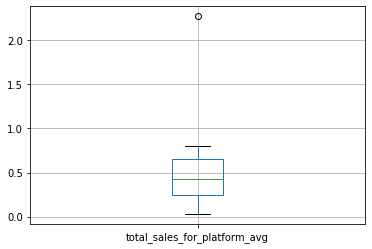

In [ ]:
relevant_sales_per_platform_avg.boxplot(column='total_sales_for_platform_avg')

The average sales on various platforms have less significant differences. All of the data is closer to the mean and is grouped on one area of the boxplot. There is one outlier that is significantly larger. 

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). 

PS2 was the most popular platform and I will analyze how user and professional reviews affect sales for this popular platform.

#### Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


In [ ]:
relevant_PS2 = relevant_df[relevant_df['platform'] == 'PS2']

In [ ]:
relevant_PS2 = relevant_PS2[relevant_PS2['user_score']>=0]

In [ ]:
relevant_PS2 = relevant_PS2[relevant_PS2['critic_score']>=0]

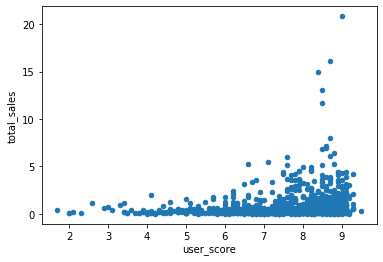

In [ ]:
relevant_PS2.plot(x='user_score', y='total_sales', kind='scatter')

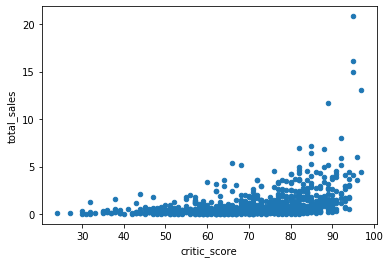

In [ ]:
relevant_PS2.plot(x='critic_score', y='total_sales', kind='scatter')

<div style="border:solid #ebd731; 4px; padding: 20px">Same here and below.</div>

In [ ]:
relevant_PS2.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.066385,-0.177203,-0.064916,0.059087,-0.110356,-0.053078,-0.080508
na_sales,-0.066385,1.000000,0.655312,0.261896,0.575840,0.390233,0.169334,0.927369
eu_sales,-0.177203,0.655312,1.000000,0.283266,0.265005,0.291779,0.124795,0.766618
jp_sales,-0.064916,0.261896,0.283266,1.000000,0.213619,0.214256,0.147916,0.452669
other_sales,0.059087,0.575840,0.265005,0.213619,1.000000,0.207457,0.074942,0.716110
critic_score,-0.110356,0.390233,0.291779,0.214256,0.207457,1.000000,0.565841,0.386415
user_score,-0.053078,0.169334,0.124795,0.147916,0.074942,0.565841,1.000000,0.171690
total_sales,-0.080508,0.927369,0.766618,0.452669,0.716110,0.386415,0.171690,1.000000


In both scatterplots, it seems that total sales increase as the scores increase, for both critic and user reviews. However, the correlation shows that there is a higher correlation for critic scores (0.386) than user scores (0.172). This means that PS2 players value critic reviews slightly more than user reviews and see them as more trustworthy.

#### Keeping your conclusions in mind, compare the sales of games on other platforms.

X360

In [ ]:
relevant_X360 = relevant_df[relevant_df['platform'] == 'X360']

In [ ]:
relevant_X360 = relevant_X360[relevant_X360['user_score']>=0]

In [ ]:
relevant_X360 = relevant_X360[relevant_X360['critic_score']>=0]

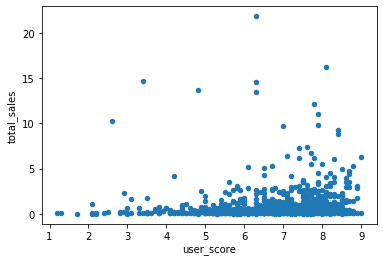

In [ ]:
relevant_X360.plot(x='user_score', y='total_sales', kind='scatter')

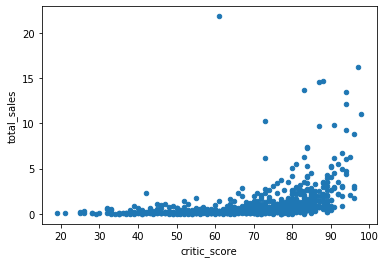

In [ ]:
relevant_X360[relevant_X360['critic_score']>0].plot(x='critic_score', y='total_sales', kind='scatter')

In [ ]:
relevant_X360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,0.036286,0.109241,-0.082736,0.047521,-0.010906,-0.162320,0.057813
na_sales,0.036286,1.000000,0.867076,0.516617,0.966921,0.373209,0.102680,0.986051
eu_sales,0.109241,0.867076,1.000000,0.496487,0.953073,0.380524,0.107795,0.937464
jp_sales,-0.082736,0.516617,0.496487,1.000000,0.535311,0.279094,0.172285,0.537560
other_sales,0.047521,0.966921,0.953073,0.535311,1.000000,0.397901,0.120049,0.992809
critic_score,-0.010906,0.373209,0.380524,0.279094,0.397901,1.000000,0.625020,0.388992
user_score,-0.162320,0.102680,0.107795,0.172285,0.120049,0.625020,1.000000,0.110280
total_sales,0.057813,0.986051,0.937464,0.537560,0.992809,0.388992,0.110280,1.000000


PS3

In [ ]:
relevant_PS3 = relevant_df[relevant_df['platform'] == 'PS3']

In [ ]:
relevant_PS3 = relevant_PS3[relevant_PS3['user_score']>=0]

In [ ]:
relevant_PS3 = relevant_PS3[relevant_PS3['critic_score']>=0]

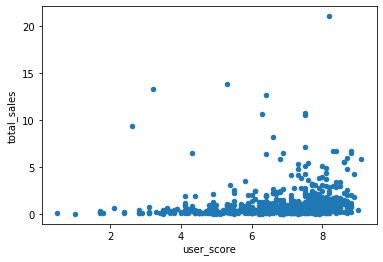

In [ ]:
relevant_PS3[relevant_PS3['user_score']>0].plot(x='user_score', y='total_sales', kind='scatter')

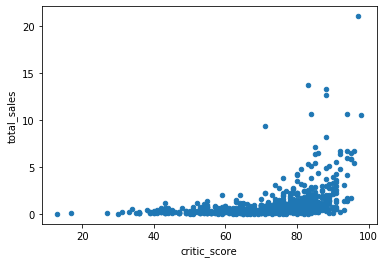

In [ ]:
relevant_PS3[relevant_PS3['critic_score']>0].plot(x='critic_score', y='total_sales', kind='scatter')

In [ ]:
relevant_PS3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.057800,0.016808,0.102977,-0.001280,0.003276,-0.047437,-0.007750
na_sales,-0.057800,1.000000,0.825403,0.375620,0.871465,0.450629,0.150631,0.940013
eu_sales,0.016808,0.825403,1.000000,0.417368,0.978001,0.378263,0.107035,0.961846
jp_sales,0.102977,0.375620,0.417368,1.000000,0.416060,0.194475,0.166781,0.491768
other_sales,-0.001280,0.871465,0.978001,0.416060,1.000000,0.390654,0.127973,0.975359
critic_score,0.003276,0.450629,0.378263,0.194475,0.390654,1.000000,0.631154,0.428213
user_score,-0.047437,0.150631,0.107035,0.166781,0.127973,0.631154,1.000000,0.143978
total_sales,-0.007750,0.940013,0.961846,0.491768,0.975359,0.428213,0.143978,1.000000


Wii

In [ ]:
relevant_Wii = relevant_df[relevant_df['platform'] == 'Wii']

In [ ]:
relevant_Wii = relevant_Wii[relevant_Wii['user_score']>=0]

In [ ]:
relevant_Wii = relevant_Wii[relevant_Wii['critic_score']>=0]

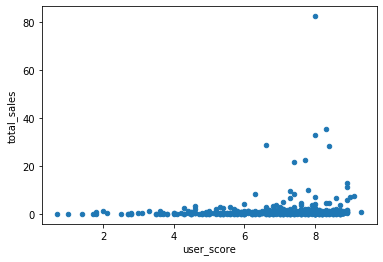

In [ ]:
relevant_Wii.plot(x='user_score', y='total_sales', kind='scatter')

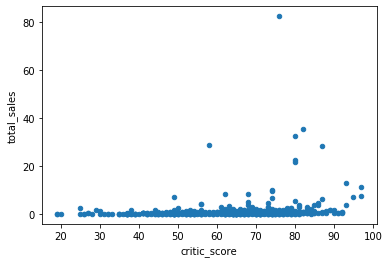

In [ ]:
relevant_Wii.plot(x='critic_score', y='total_sales', kind='scatter')

In [ ]:
relevant_Wii.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.063189,-0.052390,-0.027091,-0.067319,0.199993,0.078134,-0.057849
na_sales,-0.063189,1.000000,0.979393,0.792153,0.991366,0.171222,0.109735,0.994412
eu_sales,-0.052390,0.979393,1.000000,0.795263,0.993853,0.156829,0.102459,0.991969
jp_sales,-0.027091,0.792153,0.795263,1.000000,0.786926,0.196070,0.128983,0.829994
other_sales,-0.067319,0.991366,0.993853,0.786926,1.000000,0.154887,0.100849,0.995499
critic_score,0.199993,0.171222,0.156829,0.196070,0.154887,1.000000,0.688285,0.170855
user_score,0.078134,0.109735,0.102459,0.128983,0.100849,0.688285,1.000000,0.110637
total_sales,-0.057849,0.994412,0.991969,0.829994,0.995499,0.170855,0.110637,1.000000


In all platforms, the critic score has a slightly higher correlation with the total sales. However, both can cause higher sales, which can be seen by the slight upward trend in the scatterplots. This supports our first conclusion made using the most popular platform, PS2.

#### Take a look at the general distribution of games by genre. 

In [ ]:
games_per_genre = relevant_df.pivot_table(index='genre', values='total_sales', aggfunc='count')

In [ ]:
games_per_genre.columns = ['number_games_in_genre']

In [ ]:
print(games_per_genre.sort_values(by='number_games_in_genre', ascending=False))

              number_games_in_genre
genre                              
Action                         3214
Sports                         2209
Misc                           1679
Role-Playing                   1410
Adventure                      1267
Shooter                        1218
Racing                         1191
Simulation                      828
Platform                        795
Fighting                        763
Strategy                        644
Puzzle                          521


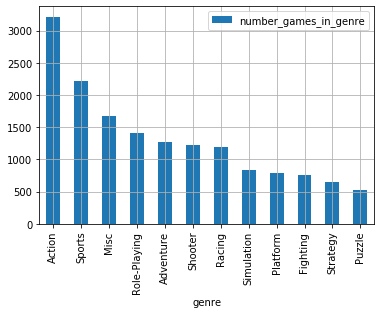

In [ ]:
games_per_genre.sort_values(by='number_games_in_genre', ascending=False).plot(y='number_games_in_genre', grid=True, kind='bar')

Most games are in the action or sports genres.

#### What can we say about the most profitable genres? 

In [ ]:
sales_per_genre = relevant_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')

In [ ]:
sales_per_genre.columns = ['total_sales_sum']

In [ ]:
print(sales_per_genre.sort_values(by='total_sales_sum', ascending=False))

              total_sales_sum
genre                        
Action                1641.49
Sports                1250.34
Shooter                963.79
Role-Playing           874.20
Misc                   767.27
Racing                 686.32
Platform               595.14
Fighting               387.73
Simulation             374.95
Adventure              209.54
Strategy               160.34
Puzzle                 155.68


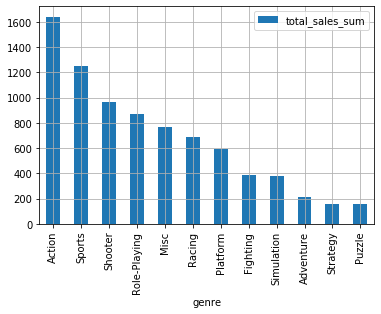

In [ ]:
sales_per_genre.sort_values(by='total_sales_sum', ascending=False).plot(y='total_sales_sum', grid=True, kind='bar')

Action and sports are most profitable. This could be because most games are in these genres. 

#### Can you generalize about genres with high and low sales?


I can generalize that genres that are more popular (more games in this genre than others) are more profitable. 

## Step 4. Create a user profile for each region

### The top five platforms in each region

#### North America

In [ ]:
na_platform_data = relevant_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [ ]:
print(na_platform_data.head())

          na_sales
platform          
X360        595.74
PS2         572.92
Wii         486.87
PS3         390.13
DS          380.31


#### Europe

In [ ]:
eu_platform_data = relevant_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [ ]:
print(eu_platform_data.head())

          eu_sales
platform          
PS2         332.63
PS3         327.21
X360        268.32
Wii         258.32
PS          201.34


#### Japan 

In [ ]:
jp_platform_data = relevant_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [ ]:
print(jp_platform_data.head())

          jp_sales
platform          
DS          175.00
PS2         137.54
PS          127.57
3DS         100.62
PS3          79.41


#### Describe variations in their market shares from region to region.


 
The top platform is X360 in North America, PS2 in Europe, and DS in Japan. X360, PS2, and DS are near the top in almost all of these regions. The only one that is not near the top is X360 in Japan.

### The top five genres in each region

#### North America

In [ ]:
na_genre_data = relevant_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [ ]:
print(na_genre_data.head())

         na_sales
genre            
Action     812.38
Sports     652.51
Shooter    526.89
Misc       390.11
Racing     340.55


#### Europe

In [ ]:
eu_genre_data = relevant_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [ ]:
print(eu_genre_data.head())

         eu_sales
genre            
Action     502.90
Sports     366.07
Shooter    307.75
Racing     228.76
Misc       207.32


#### Japan 

In [ ]:
jp_genre_data = relevant_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [ ]:
print(jp_genre_data.head())

              jp_sales
genre                 
Role-Playing    302.08
Action          145.20
Sports          100.44
Misc             97.08
Platform         70.69


#### Explain the difference.


In North America and Europe, the action, sports, shooter, and racing genres are the most popular. In Japan, the action, sports, role playing, and platform genres are most popular.

### Do ESRB ratings affect sales in individual regions?

#### North America

In [ ]:
na_rating_data = relevant_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

In [ ]:
print(na_rating_data)

                na_sales
rating                  
E                1274.24
unknown rating    850.39
T                 747.19
M                 742.87
E10+              345.50
K-A                 2.56
EC                  1.53
AO                  1.26
RP                  0.00


#### Europe

In [ ]:
eu_rating_data = relevant_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

In [ ]:
print(eu_rating_data)

                eu_sales
rating                  
E                 703.87
unknown rating    521.81
M                 480.00
T                 420.73
E10+              183.33
AO                  0.61
K-A                 0.27
EC                  0.11
RP                  0.03


#### Japan 

In [ ]:
jp_rating_data = relevant_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

In [ ]:
print(jp_rating_data)

                jp_sales
rating                  
unknown rating    571.14
E                 197.96
T                 150.17
M                  63.58
E10+               40.20
K-A                 1.46
AO                  0.00
EC                  0.00
RP                  0.00


It seems that E, M, and T ratings have the highest sales in each region. However, I cannot be sure because a significant amount of data is in the unknown rating category, where there were missing values. If unknown rating means that the games were not rated, then not rated also has some of the highest sales.

## Step 5. Test the following hypotheses:


### Average user ratings of the Xbox One and PC platforms are the same.


In [ ]:
user_rating_XboxOne = relevant_XOne['user_score']

In [ ]:
user_rating_PC = relevant_PC['user_score']

#### Set the alpha threshold value yourself.

In [ ]:
alpha = 0.05 

#### Explain what significance level you chose to test the hypotheses, and why.


I set alpha = 0.05 because this is the conventional threshold value for the p-value. This is the significance level that I chose to test the hypotheses. I would not want to be wrong more than 5% of the time.

In [ ]:
results = st.ttest_ind(
        user_rating_XboxOne, 
        user_rating_PC)

In [ ]:
print('p-value: ', results.pvalue)

p-value:  0.00027489908486236773


In [ ]:
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We reject the null hypothesis


#### Explain how you formulated the null and alternative hypotheses


Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.

Alternative hypothesis: Average user ratings of the Xbox One and PC platforms are different.

Since we reject the null hypothesis, the alternative hypothesis is not rejected so we can say that  the average user ratings of the Xbox One and PC platforms are different.

### Average user ratings for the Action and Sports genres are different.

In [ ]:
print(relevant_df['genre'].unique())

['Sports' 'Racing' 'Role-Playing' 'Platform' 'Misc' 'Simulation' 'Action'
 'Puzzle' 'Shooter' 'Fighting' 'Adventure' 'Strategy']


In [ ]:
relevant_action = relevant_df[relevant_df['genre'] == 'Action']

In [ ]:
relevant_sports = relevant_df[relevant_df['genre'] == 'Sports']

In [ ]:
user_rating_action = relevant_action['user_score']

In [ ]:
user_rating_sports = relevant_sports['user_score']

#### Set the alpha threshold value yourself.

In [ ]:
alpha = 0.05 

#### Explain what significance level you chose to test the hypotheses, and why.


I set alpha = 0.05 because this is the conventional threshold value for the p-value. This is the significance level that I chose to test the hypotheses. I would not want to be wrong more than 5% of the time.

In [ ]:
results = st.ttest_ind(
        user_rating_action, 
        user_rating_sports)

In [ ]:
print('p-value: ', results.pvalue)

p-value:  2.963066930660666e-07


In [ ]:
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We reject the null hypothesis


#### Explain how you formulated the null and alternative hypotheses


Null hypothesis: Average user ratings for the Action and Sports genres are equal.

Alternative hypothesis: Average user ratings for the Action and Sports genres are different.

Since we reject the null hypothesis, the alternative hypothesis is not rejected so we can say that the average user ratings for the Action and Sports genres are different. 

## Step 6. Write a general conclusion


From the data, I would recommend to plan advertising campaigns for the platforms that have not reached a high peak in a 10 year period. Most successful platforms have a peak and then lose popularity after 10 years of existing. This could because users get older and no longer play as much or because game consoles break in this time period. After this 10 year period, a new audience has a new popular video game platform. I would mostly recommend to advertise PS4 but XOne also has some potential.

